In [25]:
%load_ext watermark
%watermark -a Filippo_Valle -p pandas,numpy,trisbm -r -b -iv -v -m

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Author: Filippo_Valle

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 7.31.0

pandas: 1.3.5
numpy : 1.20.3
trisbm: 0.5.1

Compiler    : GCC 9.4.0
OS          : Linux
Release     : 5.19.0-29-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 12
Architecture: 64bit

Git repo: git@github.com:fvalle1/trisbm

Git branch: main

graph_tool: 2.45 (commit 71a3b6d2, )
sys       : 3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 19:20:46) 
[GCC 9.4.0]
numpy     : 1.20.3
pandas    : 1.3.5



In [26]:
%load_ext autoreload
%autoreload 2
import sys
import pandas as pd
import numpy as np
sys.path.append("../trisbm/")
from nsbm import nsbm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
df = pd.DataFrame(
index = ["w{}".format(w) for w in range(10)],
columns = ["doc{}".format(d) for d in range(25)],
data = np.random.randint(1, 10, 250).reshape((10, 25)))

df_key_list = []

## keywords
df_key_list.append(
    pd.DataFrame(
    index = ["keyword{}".format(w) for w in range(10)],
    columns = ["doc{}".format(d) for d in range(25)],
    data = np.random.randint(1, 10, (10, 25)))
)
    
## authors
df_key_list.append(
    pd.DataFrame(
    index = ["author{}".format(w) for w in range(10)],
    columns = ["doc{}".format(d) for d in range(25)],
    data = np.random.randint(1, 5, (10, 25)))
)
    
## other features
df_key_list.append(
    pd.DataFrame(
    index = ["feature{}".format(w) for w in range(25)],
    columns = ["doc{}".format(d) for d in range(25)],
    data = np.random.randint(1, 5, (25, 25)))
)

In [29]:
df.head()

,doc0,doc1,doc2,doc3,doc4,doc5,doc6,doc7,doc8,doc9,...,doc15,doc16,doc17,doc18,doc19,doc20,doc21,doc22,doc23,doc24
w0,6,3,3,4,9,3,8,7,8,6,...,8,8,5,5,8,4,7,2,8,6
w1,8,6,4,5,7,3,6,8,2,8,...,9,5,6,6,2,6,6,4,2,6
w2,6,8,1,7,3,4,6,7,2,5,...,1,7,9,5,9,6,4,3,1,9
w3,8,7,3,9,5,3,1,3,9,1,...,1,8,9,1,2,6,1,6,3,6
w4,7,8,4,4,3,1,5,4,8,4,...,5,9,6,3,3,7,2,3,9,1


In [30]:
df_key_list[0].head()

,doc0,doc1,doc2,doc3,doc4,doc5,doc6,doc7,doc8,doc9,...,doc15,doc16,doc17,doc18,doc19,doc20,doc21,doc22,doc23,doc24
keyword0,6,7,3,1,6,5,4,3,4,4,...,6,5,2,1,1,9,3,9,6,7
keyword1,1,1,1,6,1,8,3,9,6,8,...,6,1,8,7,2,9,2,3,8,5
keyword2,5,8,9,7,5,2,4,4,3,3,...,8,4,1,7,2,9,3,9,2,8
keyword3,1,5,5,3,5,1,7,2,9,8,...,2,9,7,7,8,7,8,8,3,5
keyword4,9,1,9,1,2,7,1,6,4,9,...,2,8,2,1,4,5,1,8,3,1


In [31]:
model = nsbm()

In [32]:
model.make_graph_multiple_df(df, df_key_list)

In [33]:
model.g.vp["kind"].a

PropertyArray([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
               0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
               2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4,
               4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
              dtype=int32)

In [34]:
model.nbranches

3

In [35]:
model.fit(n_init=1, B_min=50, verbose=False)

In [36]:
model._get_shape()

(25, 10, [10, 10, 25])

In [37]:
model.g

<Graph object, undirected, with 80 vertices and 1375 edges, 2 internal vertex properties, 1 internal edge property, at 0x7fdb4b9b2c40>

In [38]:
model.metadata(0,-1,3)

{0: [('##author1', 1.0)],
 1: [('##author0', 1.0)],
 2: [('##author2', 1.0)],
 3: [('##author3', 1.0)],
 4: [('##author4', 1.0)],
 5: [('##author5', 1.0)],
 6: [('##author6', 0.5522388059701493), ('##author9', 0.44776119402985076)],
 7: [('##author7', 1.0)],
 8: [('##author8', 1.0)]}

Saving level 5
Saving level 4
Saving level 3
Saving level 2
Saving level 1
Saving level 0


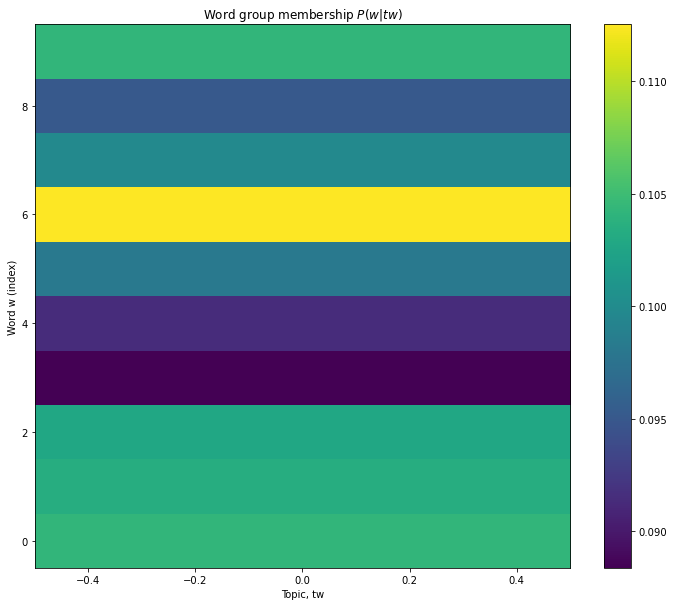

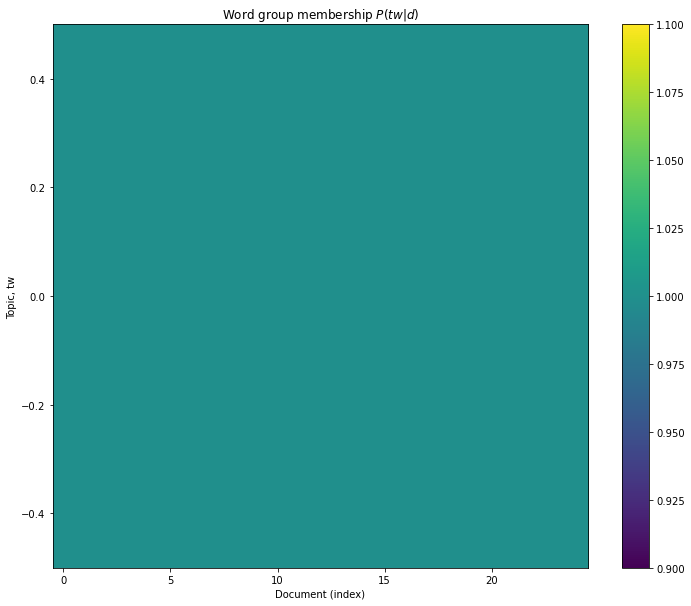

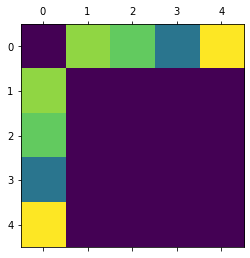

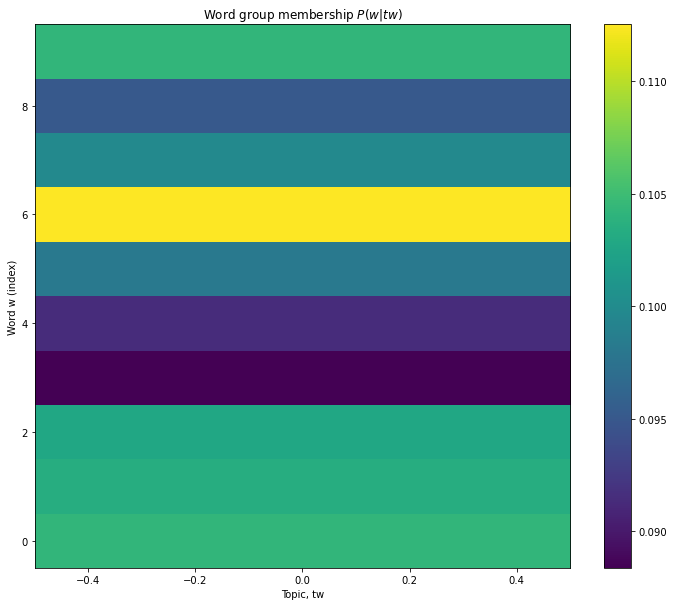

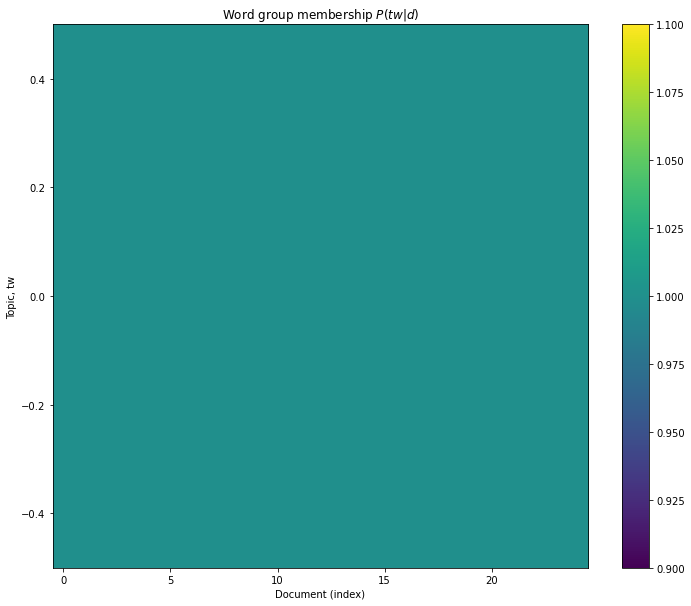

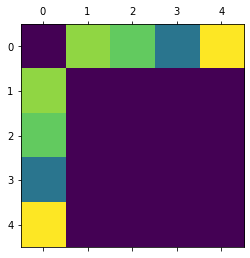

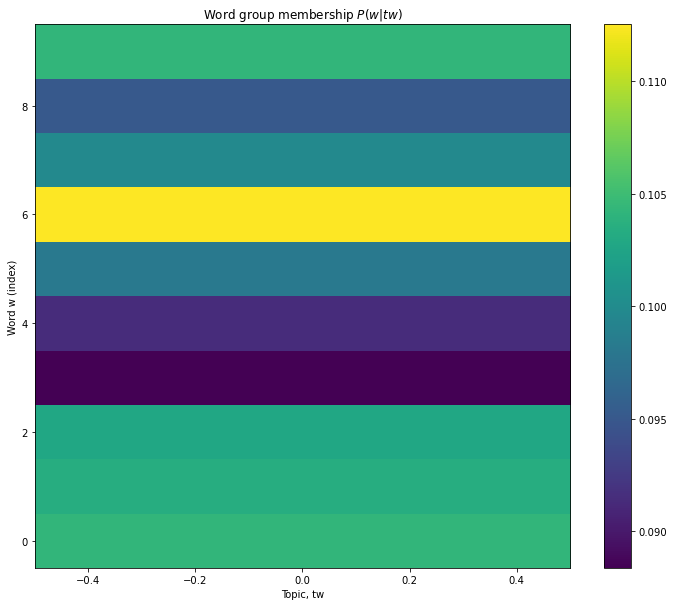

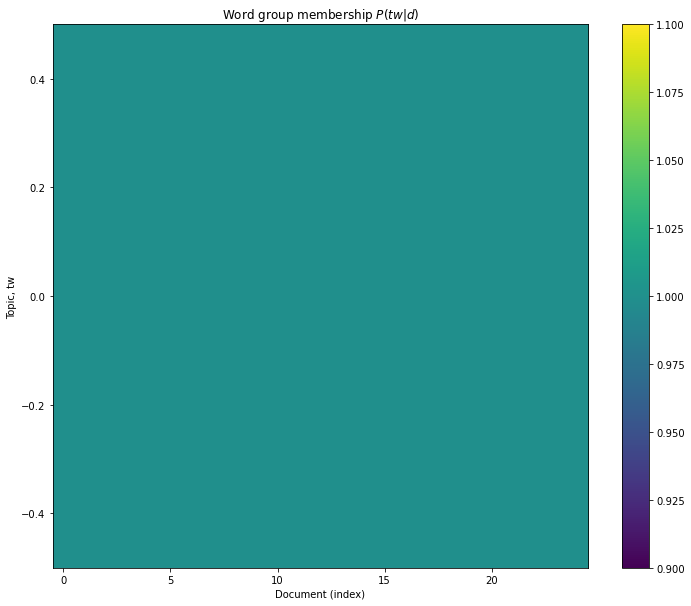

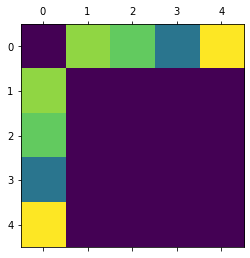

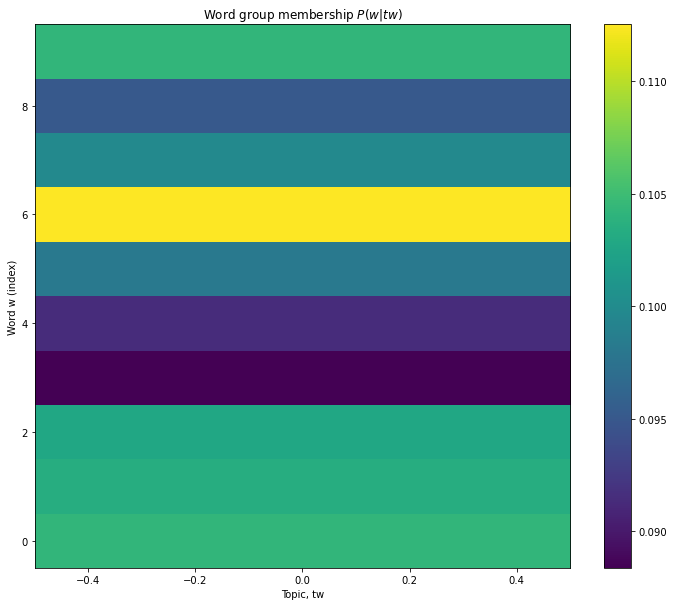

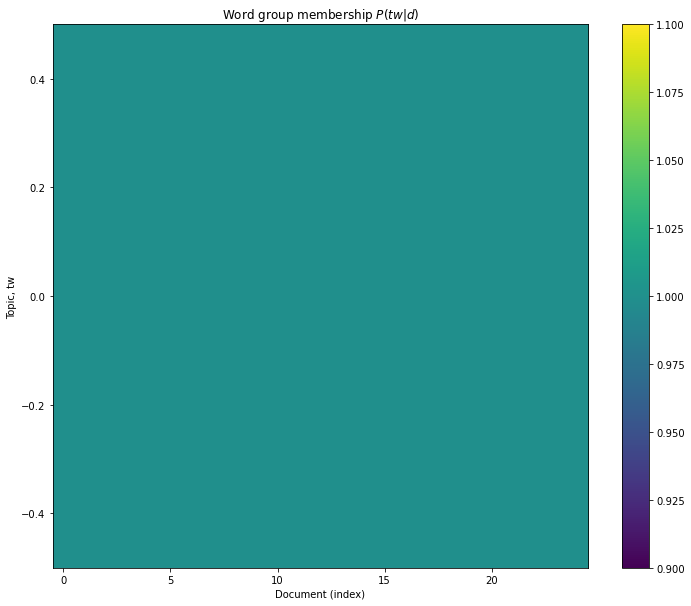

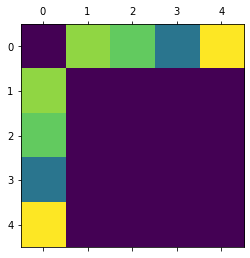

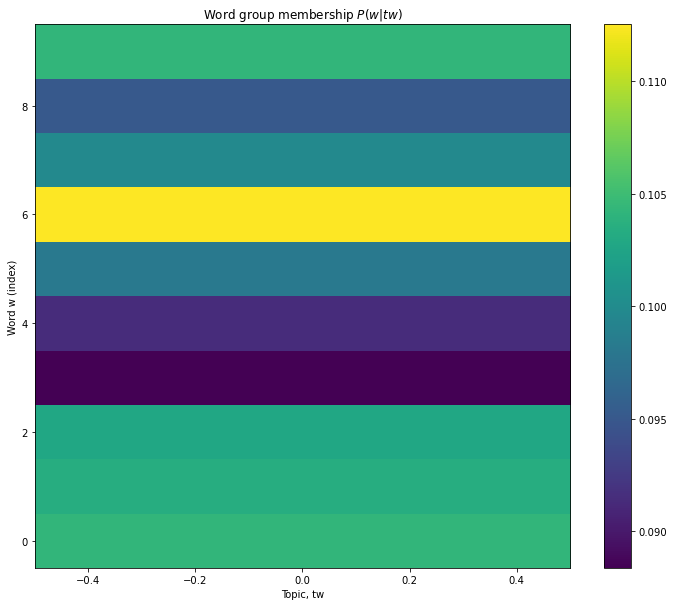

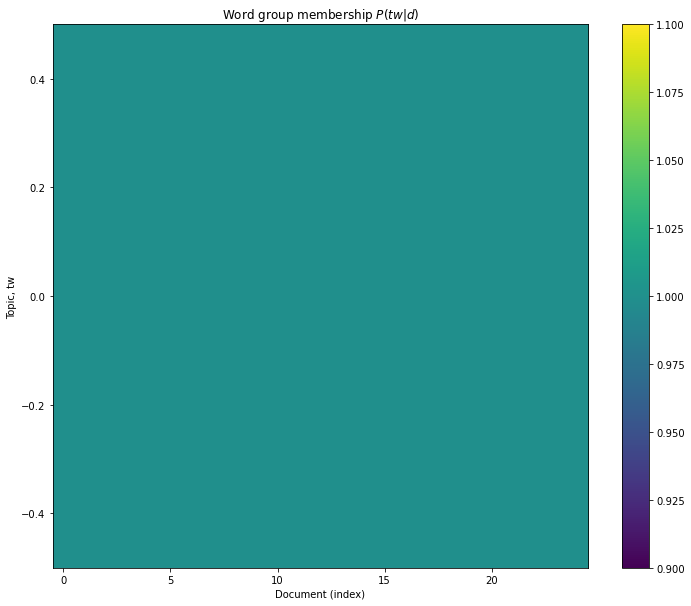

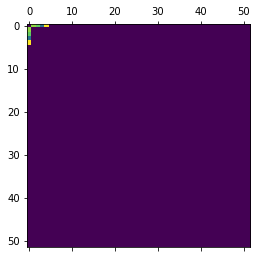

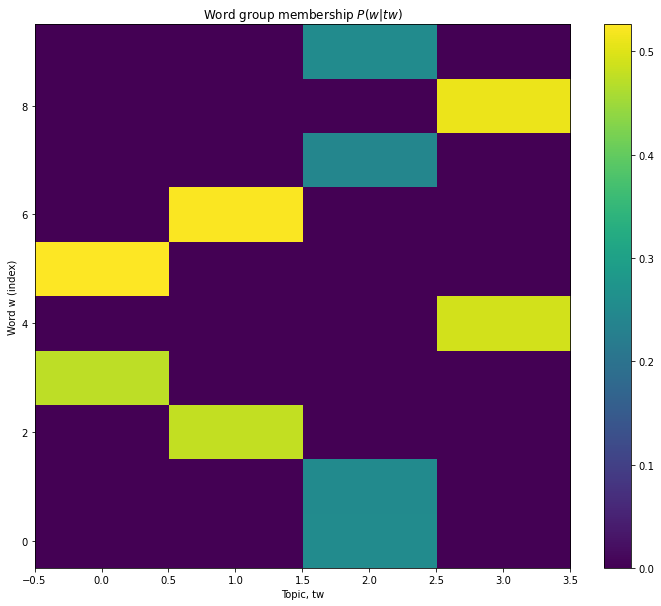

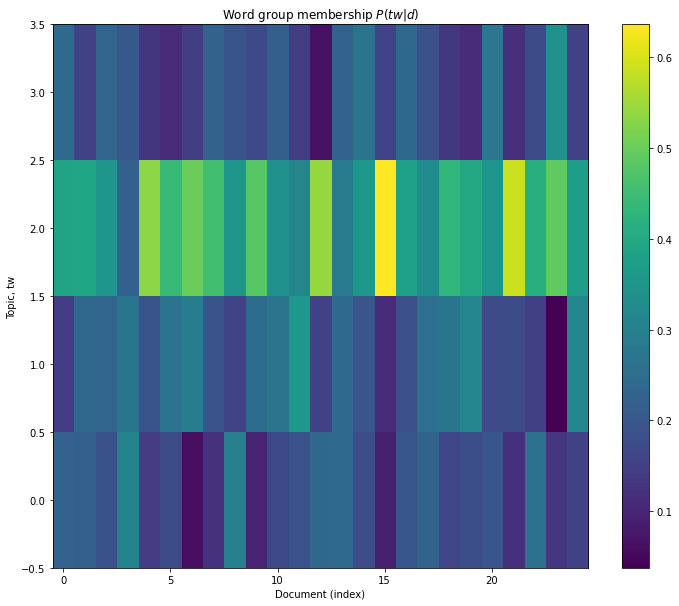

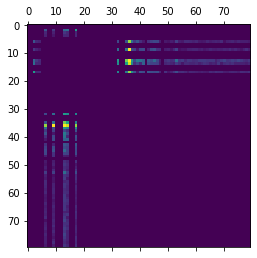

In [39]:
model.save_data()

In [40]:
model.print_summary()

In [41]:
model.metadata(l=0, n=-1, kind=2).keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [42]:
import graph_tool.all as gt

In [43]:
colmap = model.g.vertex_properties["color"] = model.g.new_vertex_property("vector<double>")
for v in model.g.vertices():
    k = model.g.vertex_properties['kind'][v]
    if k < 1:
        color = np.array([137,128,193])/255.
    elif k < 2:
        color = np.array([130,200,93])/255.
    elif k < 3:
        color = np.array([210,82,58])/255.
    elif k < 4:
        color = np.array([196,125,50])/255.
    else:
        color = np.array([187,129,164])/255.
    colmap[v] = color

In [45]:
gt.draw_hierarchy(model.state,
                layout="bipartite",
                subsample_edges=3500,
                vertex_color=colmap,
                vertex_fill_color=colmap,
                hedge_pen_width=5,
                hvertex_size=15,
                edge_pen_width=model.g.ep["count"],
                output="nsbm.png"
                 )

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fdb4b9b2c40, at 0x7fdb4b26a790>,
 <GraphView object, directed, with 163 vertices and 162 edges, edges filtered by (<EdgePropertyMap object with value type 'bool', for Graph 0x7fda93ab4730, at 0x7fdb4b3459a0>, False), vertices filtered by (<VertexPropertyMap object with value type 'bool', for Graph 0x7fda93ab4730, at 0x7fdb4b345f70>, False), at 0x7fda93ab4730>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fda93ab4730, at 0x7fda93b811f0>)